In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
bankdata = pd.read_csv('cleaned_bank_marketing_data.csv')
bankdata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,administrative,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,administrative,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,administrative,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45203,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45204,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45205,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45207 entries, 0 to 45206
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45207 non-null  int64 
 1   job        45207 non-null  object
 2   marital    45207 non-null  object
 3   education  45207 non-null  object
 4   default    45207 non-null  object
 5   balance    45207 non-null  int64 
 6   housing    45207 non-null  object
 7   loan       45207 non-null  object
 8   contact    45207 non-null  object
 9   day        45207 non-null  int64 
 10  month      45207 non-null  object
 11  duration   45207 non-null  int64 
 12  campaign   45207 non-null  int64 
 13  pdays      45207 non-null  int64 
 14  previous   45207 non-null  int64 
 15  poutcome   45207 non-null  object
 16  deposit    45207 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Exploratory Analysis

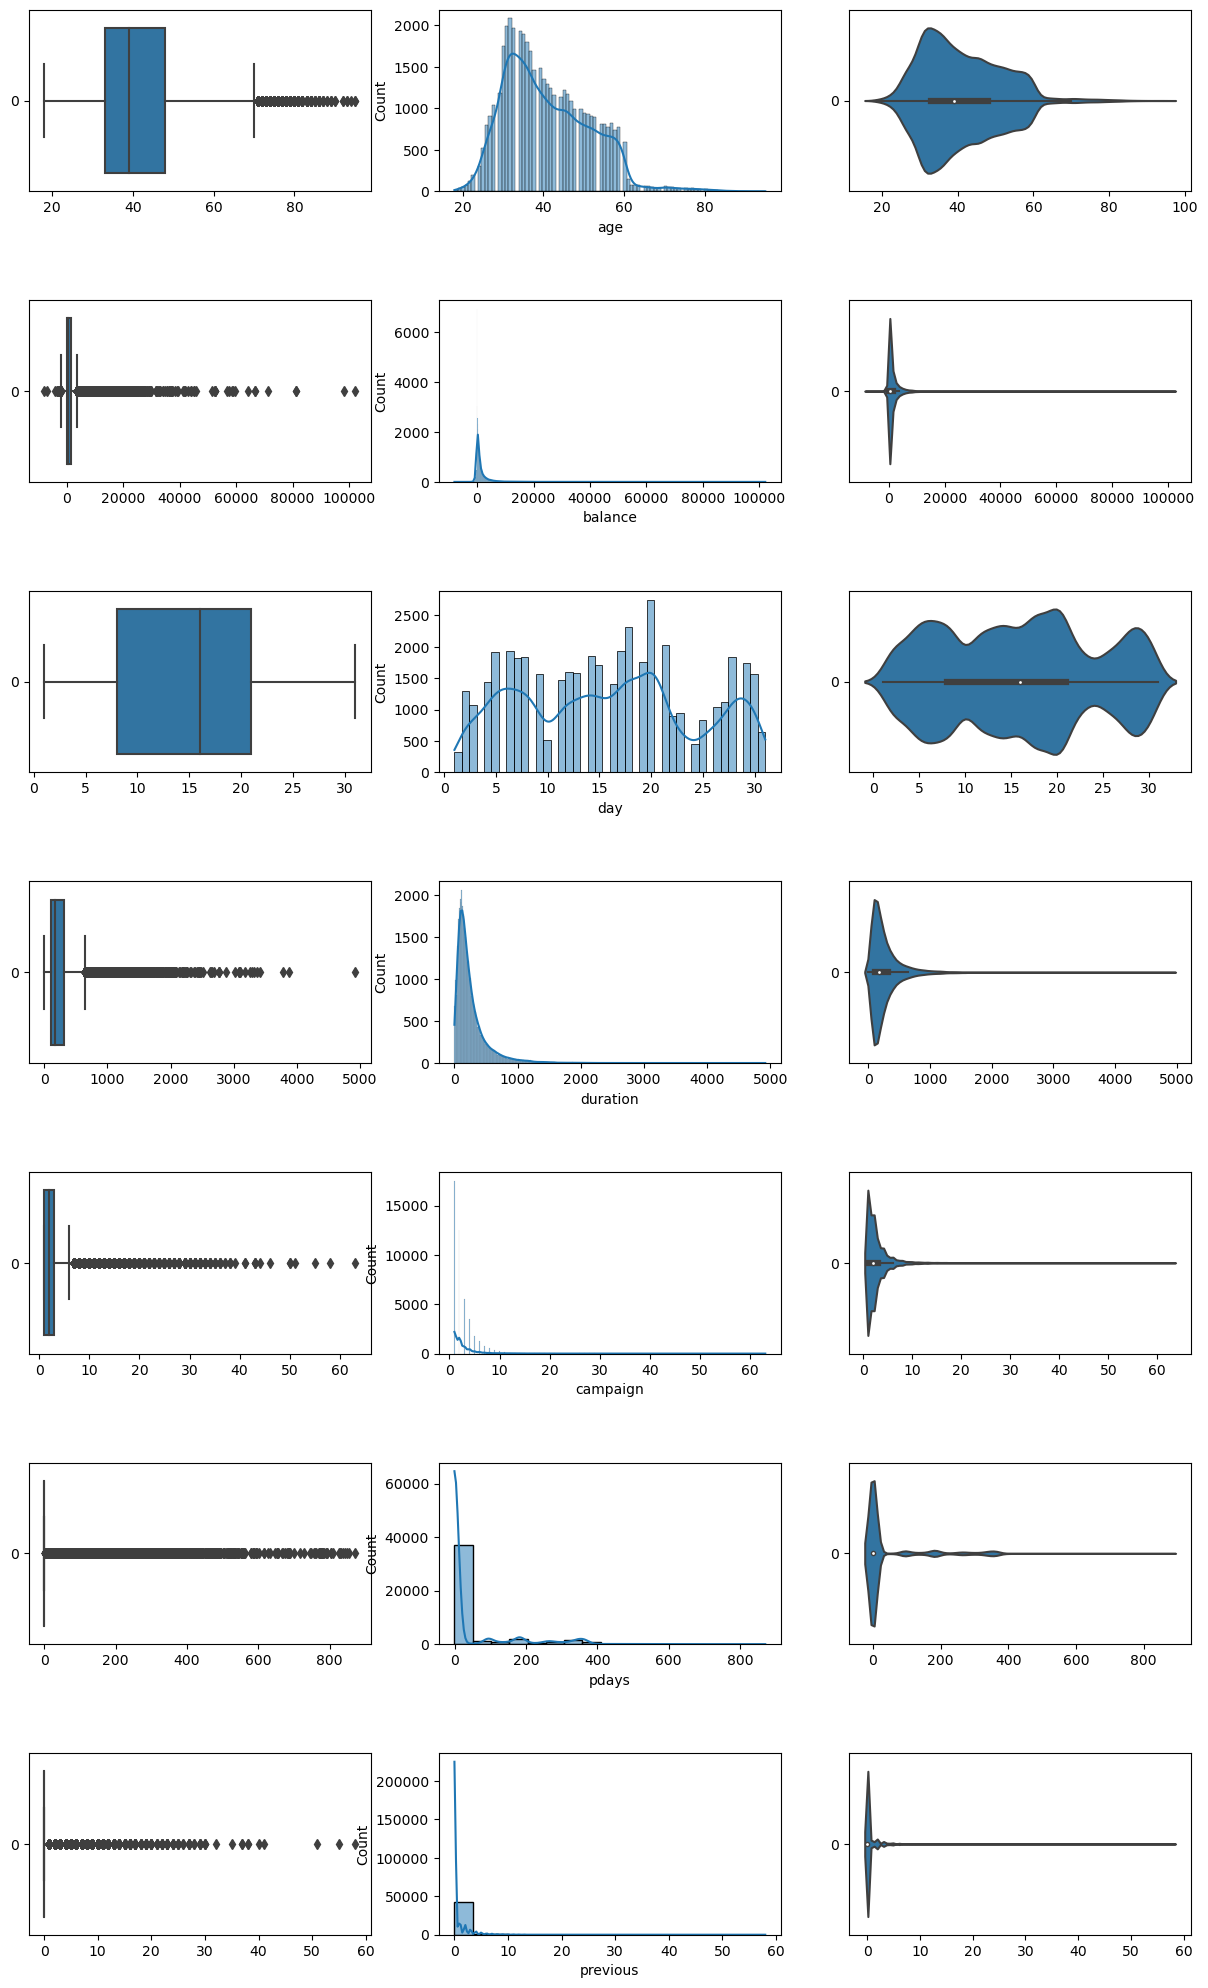

In [4]:
numcols = pd.DataFrame(bankdata[['age','balance','day','duration','campaign','pdays','previous']])
f, axes = plt.subplots(7, 3, figsize=(15,25))
count=0
for var in numcols:
    sb.boxplot(data = numcols[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numcols[var], ax = axes[count,1], kde=True)
    sb.violinplot(data = numcols[var], orient = "h", ax = axes[count,2])
    count+=1
plt.subplots_adjust(hspace=0.6)

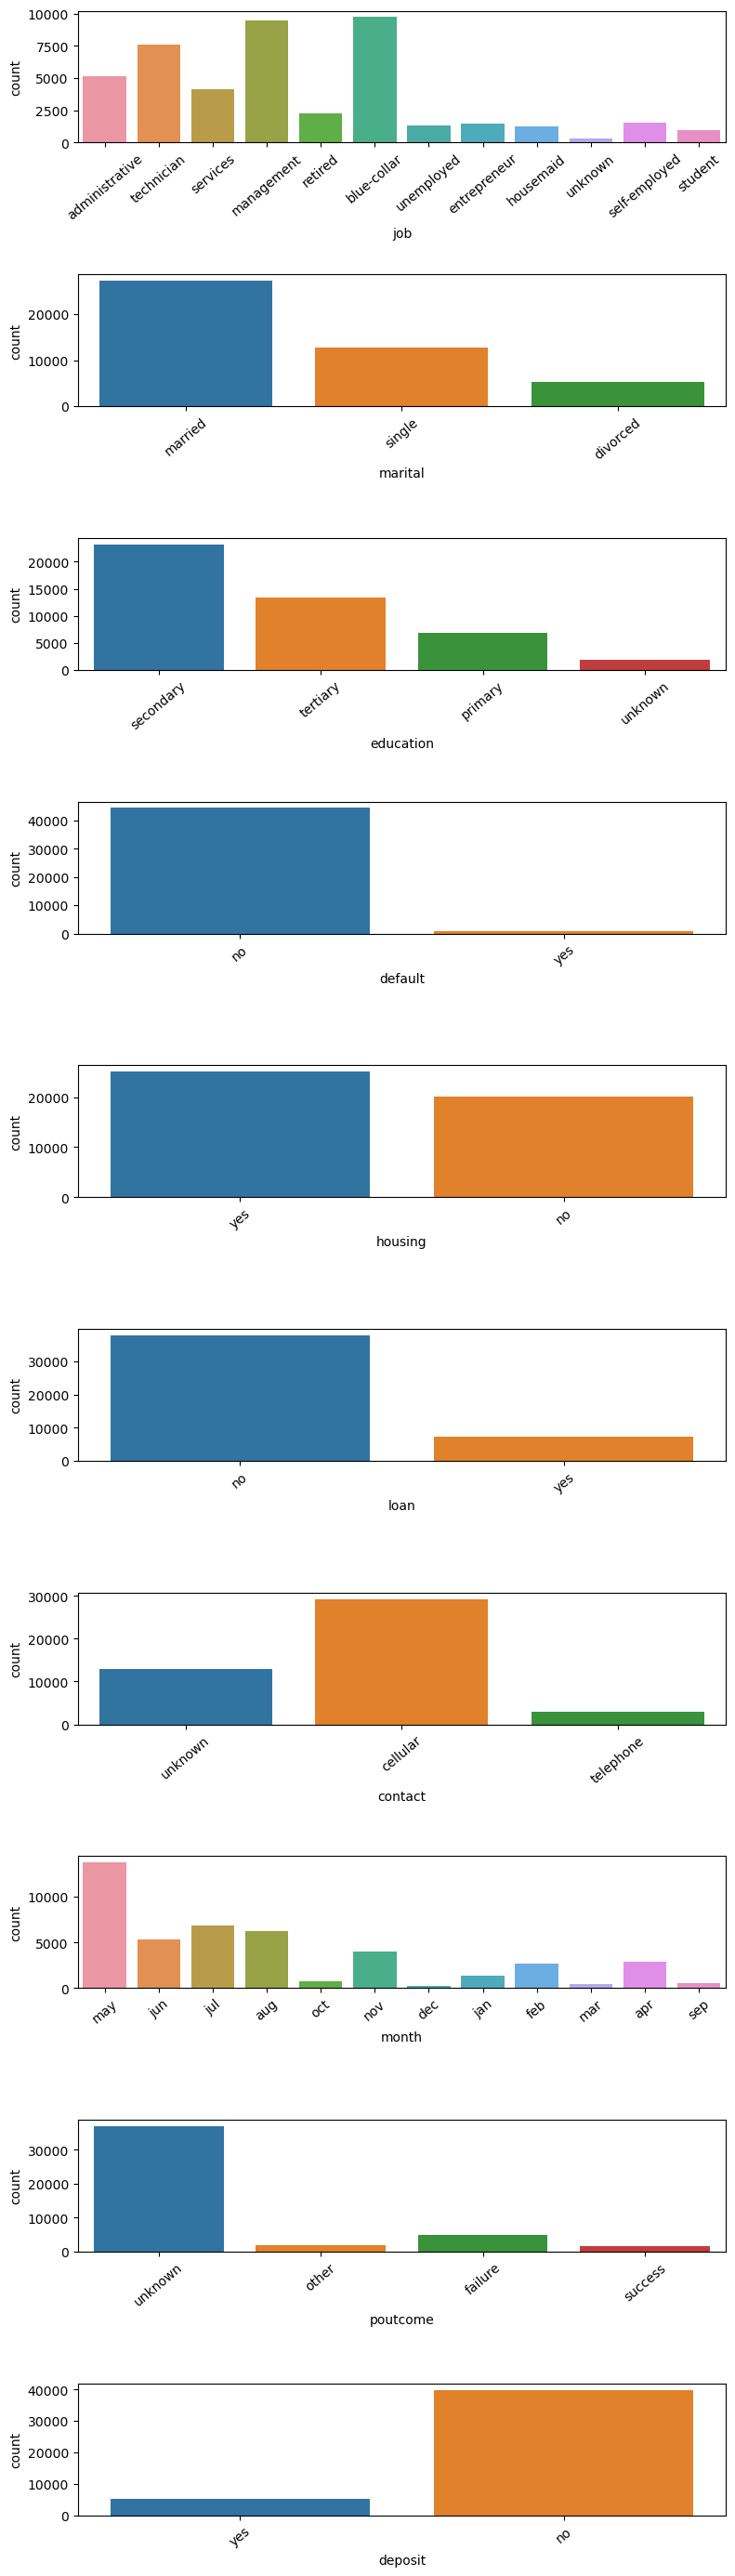

In [5]:
catcols = ['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']
f, axes = plt.subplots(10, 1, figsize=(9,35))
count=0
for var in catcols:
    sb.countplot(x=var, data=bankdata, ax=axes[count])
    axes[count].set_xticklabels(axes[count].get_xticklabels(),rotation=40)
    count+=1
plt.subplots_adjust(hspace=1.0)

Our goal here is to remove irrelevant columns that are not helpful in our study.

contact  - type of contact used to contact the customer is not useful.  

day      - last contact day of the month is not useful.  

month    - last contact month of the year is not useful.  

pdays    - Number of days since the customer was last contacted from previous campaign for the customer is not useful. Most of the values are -1 which means that the customer has never been contacted in the previous campaign. The distribution of values in the columns is heavily skewed and imbalance.  

previous - Number of contacts performed before this campaign for the customer is not useful. Most of the values are 0 which means that the customer has never been contacted before this campaign. The distribution of values in the columns is heavily skewed and imbalance.   

# Drop Useless Columns

In [6]:
bankdata.drop(columns=['contact', 'day', 'month', 'pdays', 'previous'], inplace=True)
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome,deposit
0,59,administrative,married,secondary,no,2343,yes,no,1042,1,unknown,yes
1,56,administrative,married,secondary,no,45,no,no,1467,1,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,unknown,yes
4,54,administrative,married,tertiary,no,184,no,no,673,2,unknown,yes


In [7]:
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
bankdata.describe()

,age,balance,duration,campaign
count,45207.000000,45207.000000,45207.000000,45207.000000
mean,40.936315,1362.246798,258.178202,2.763576
std,10.618940,3044.825898,257.530264,3.097614
min,18.000000,-8019.000000,1.000000,1.000000
25%,33.000000,72.000000,103.000000,1.000000
50%,39.000000,448.000000,180.000000,2.000000
75%,48.000000,1428.000000,319.000000,3.000000
max,95.000000,102127.000000,4918.000000,63.000000


# Uni-variate Analysis

In [9]:
dictionary = {'yes':1, 'no':0}
numeric = bankdata['deposit'].map(dictionary)
bankdata['deposit_num'] = numeric
bankdata

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome,deposit,deposit_num
0,59,administrative,married,secondary,no,2343,yes,no,1042,1,unknown,yes,1
1,56,administrative,married,secondary,no,45,no,no,1467,1,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,1389,1,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,579,1,unknown,yes,1
4,54,administrative,married,tertiary,no,184,no,no,673,2,unknown,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,59,management,married,tertiary,no,138,yes,yes,162,2,failure,no,0
45203,37,management,married,tertiary,no,1428,no,no,333,2,unknown,no,0
45204,34,blue-collar,single,secondary,no,1475,yes,no,1166,3,other,no,0
45205,57,blue-collar,married,secondary,no,668,no,no,508,4,unknown,no,0


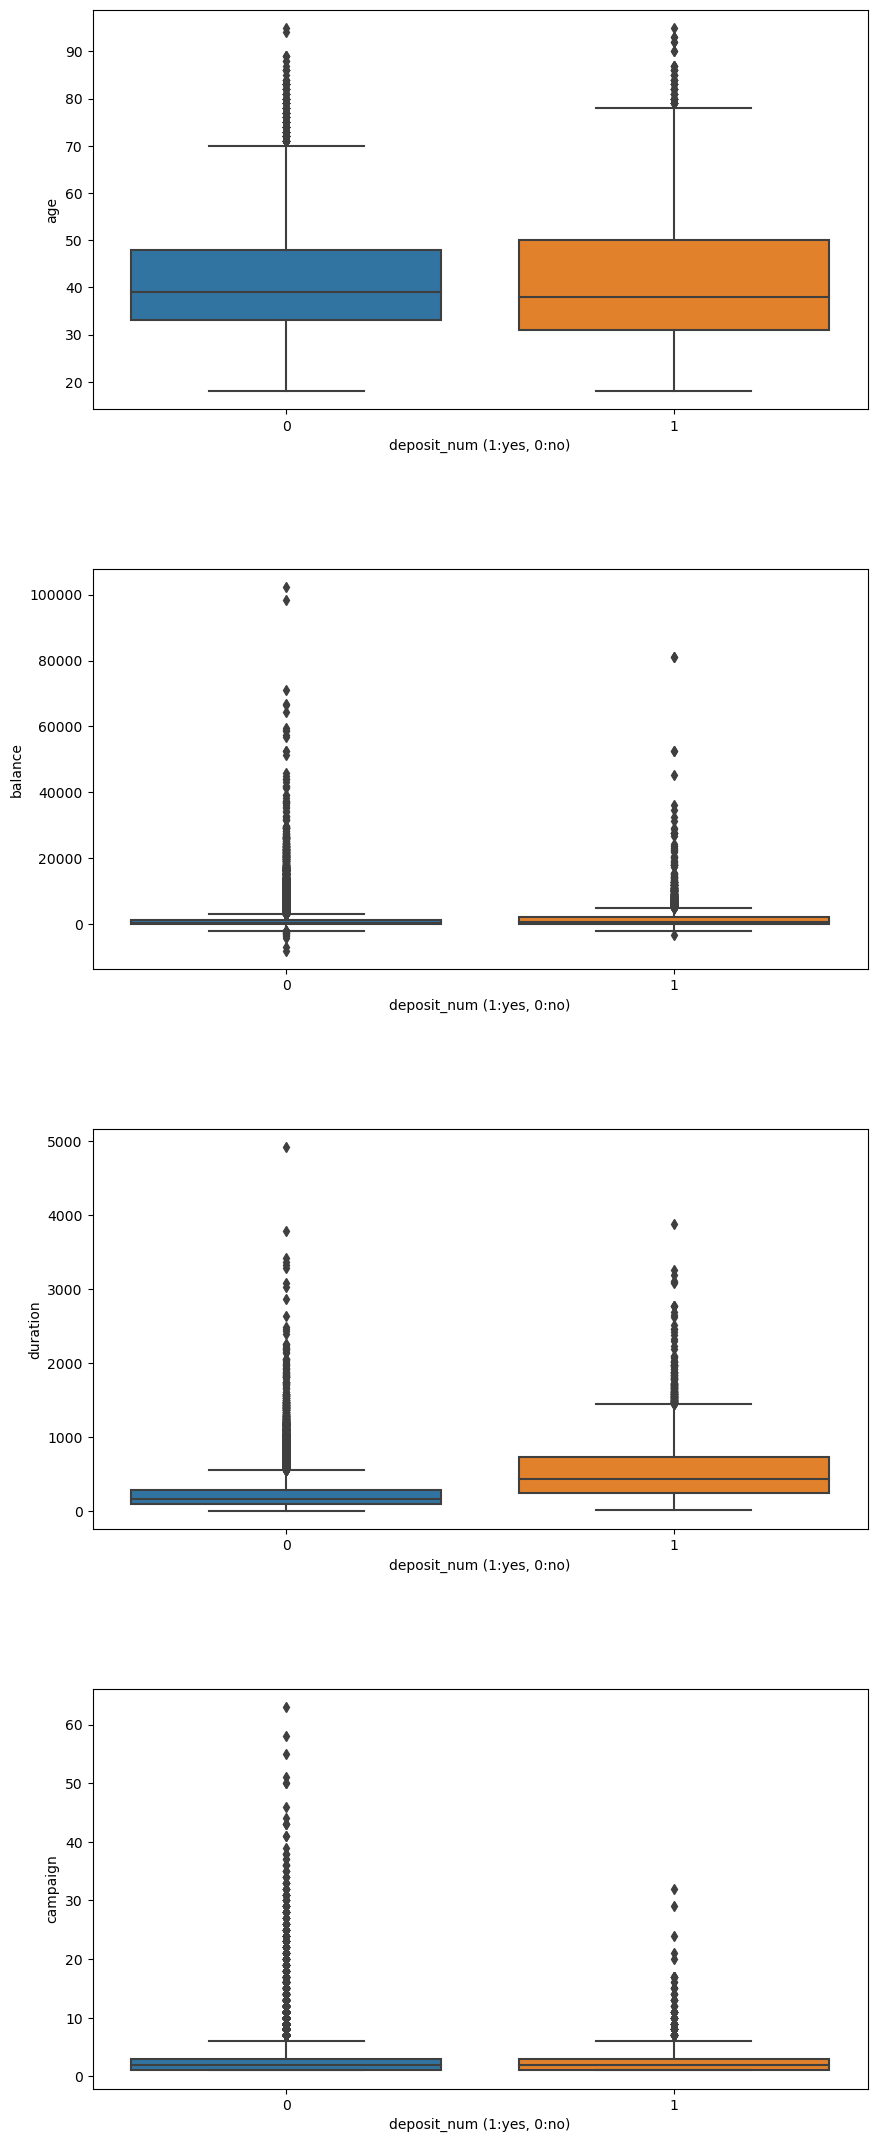

In [10]:
numcols = pd.DataFrame(bankdata[['age','balance','duration','campaign',]])
f, axes = plt.subplots(4, 1, figsize=(10,27))
count=0
for var in numcols:
    sb.boxplot(x='deposit_num', y=var, data = bankdata, ax=axes[count])
    axes[count].set_xlabel('deposit_num (1:yes, 0:no)')
    count+=1
plt.subplots_adjust(hspace=0.4)

There are no huge difference between the variables 'age', 'balance' and 'campaign' for the customers that made and do not made deposit.

For the variable 'duration', the average duration of last contact for customers who made deposit is higher than that of customers who do not made deposit by inspection.